In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import auc

%matplotlib inline

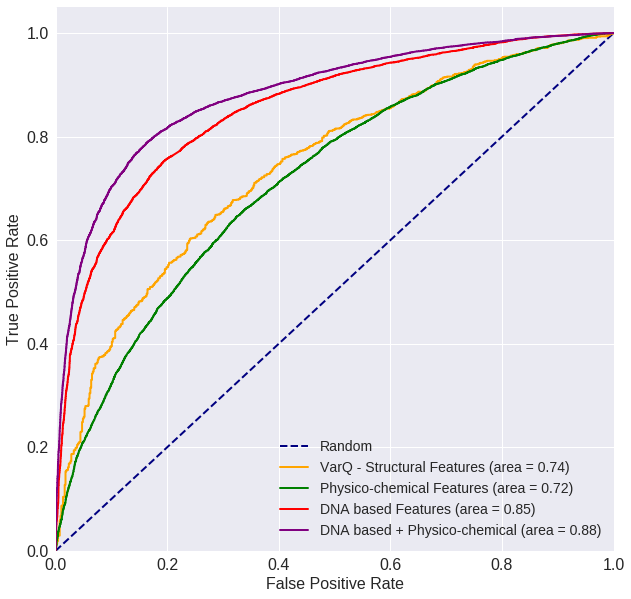

In [16]:
models = [("varq", "orange", "VarQ - Structural Features"), 
          ("structural", "green", "Physico-chemical Features"),
          ("genomic", "red", "DNA based Features"),
          ("integral", "purple", "DNA based + Physico-chemical")]

plt.figure(figsize=(10,10))
lw = 2
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--', label='Random')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)


for (model, color, title) in models:
    auc_curve = pd.read_csv("../results/{}/auc_rf.csv".format(model))
    roc_auc = auc(auc_curve.fpr, auc_curve.tpr)
    plt.plot(auc_curve.fpr, auc_curve.tpr, 
             color=color,lw=lw, 
             label='%s (area = %0.2f)' % (title, roc_auc))

plt.legend(loc="lower right", prop={'size': 14})    
